In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ibm_hr_dataset_com_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 65 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EmployeeCount                  1000000 non-null  int64  
 9   EmployeeNumber                 1000000 non-null  int64  
 10  EnvironmentSatisfaction        1000000 non-null  int64  
 11  Gender                         1000000 non-null  object 
 12  HourlyRate     

# Preparando dados modelagem

In [3]:
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df.drop(columns=cols_to_drop)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EnvironmentSatisfaction        1000000 non-null  int64  
 9   Gender                         1000000 non-null  object 
 10  HourlyRate                     1000000 non-null  int64  
 11  JobInvolvement                 1000000 non-null  int64  
 12  JobLevel       

In [4]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EnvironmentSatisfaction        1000000 non-null  int64  
 9   Gender                         1000000 non-null  object 
 10  HourlyRate                     1000000 non-null  int64  
 11  JobInvolvement                 1000000 non-null  int64  
 12  JobLevel       

In [ ]:
label_encoder = LabelEncoder()
df_processed['Attrition'] = label_encoder.fit_transform(df_processed['Attrition'])
numeric_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numeric_features.remove('Attrition')
print(f"Features numéricas: {numeric_features}")
print(f"Features categóricas: {categorical_features}")

Features numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerYear', 'TotalSatisfaction', 'PromotionRate', 'LongTimeNoPromotion', 'AgeStartedWorking', 'YearsInOtherCompanies', 'CompanyChangeRate', 'AnosCargoSemPromocao', 'CargoAlto_HorasExtras', 'ScoreEstab_Carreira', 'ScoreEstabilidadeFormat', 'Burnout', 'PercAnoEmpresaAtual', 'SalarioPorTempodeCasa', 'TreinamentosPorTempodeCasa', 'TempoCargoAtualPeloNivel', 'TempSemPromoPorTempComManager', 'TempGestAtualPorTempodeCasa', 'SalarioPorKm', 'SalarioPorNivelEdu', 'SalarioPorSatisf', 'PromotionsPerYear', 'CompaniesPerYear', 'YearsInRole

## Encoding variaveris categoricas
    Nada mais que é que pivotar ou algo semelhantes

In [6]:
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 80 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Age                                1000000 non-null  int64  
 1   Attrition                          1000000 non-null  int64  
 2   DailyRate                          1000000 non-null  int64  
 3   DistanceFromHome                   1000000 non-null  int64  
 4   Education                          1000000 non-null  int64  
 5   EnvironmentSatisfaction            1000000 non-null  int64  
 6   HourlyRate                         1000000 non-null  int64  
 7   JobInvolvement                     1000000 non-null  int64  
 8   JobLevel                           1000000 non-null  int64  
 9   JobSatisfaction                    1000000 non-null  int64  
 10  MonthlyIncome                      1000000 non-null  int64  
 11  MonthlyRate              

## Divisão de treino e teste

In [ ]:
X = df_encoded.drop('Attrition', axis=1) #features
y = df_encoded['Attrition'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #usando o stratify para manter a proporção de classes no conjunto de teste devido ao desbalanceamento
print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Total de features: {X_train.shape[1]}")
print(f"Proporção Attrition no treino: {y_train.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")


Tamanho do conjunto de treino: (800000, 79)
Tamanho do conjunto de teste: (200000, 79)
Total de features: 79
Proporção Attrition no treino: 17.88%
Proporção Attrition no teste: 17.88%


### Oversampling

#### SMOTE
    Cria exemplos sintéticos da classe minoritária combinando exemplos reais.

In [62]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print(y_train.value_counts(), y_train_over.value_counts())

ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/fixes.py)

#### ADASYN
    Parecido com SMOTE, mas gera mais exemplos em áreas de difícil classificação.

In [64]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print(y_train.value_counts(), y_train_adasyn.value_counts())

ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/fixes.py)

#### RandomOverSampler
    Simplesmente replica exemplos da minoria.

### Undersampling

#### RandomUnderSampler
    Remove exemplos da classe majoritária.

In [65]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print(y_train.value_counts(), y_train_under.value_counts())

ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/fixes.py)

#### Tomek Links, NearMiss
    Métodos mais inteligentes para escolher quais exemplos da maioria remover.


## Normalização das features

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.16146086, -0.6367355 , -0.67657711, ...,  1.45787197,
         0.79681569, -0.79681569],
       [ 0.86431596, -1.7232543 , -0.67657711, ..., -0.68593129,
         0.79681569, -0.79681569],
       [ 2.30040352,  0.82103119, -0.98479489, ..., -0.68593129,
         0.79681569, -0.79681569],
       ...,
       [ 1.17204901,  0.99675519, -0.06014157, ...,  1.45787197,
         0.79681569, -0.79681569],
       [ 1.78751511,  1.02645502, -0.98479489, ..., -0.68593129,
         0.79681569, -0.79681569],
       [ 0.0436945 , -0.39418688, -0.06014157, ..., -0.68593129,
        -1.25499536,  1.25499536]], shape=(800000, 79))

## Feature selection

### Baixa variancia

In [45]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_train_var = selector.fit_transform(X_train)
# Recupera os nomes das features mantidas
features_var = X_train.columns[selector.get_support()]
print("Top features após VarianceThreshold:")
print(features_var[:20])

Top features após VarianceThreshold:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


### Correlação
    Faz uma correlação entre elas e tira as colunas que são mais reduntantes

In [76]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train_corr = X_train.drop(drop_cols, axis=1)
print("Features após remoção de correlação alta:")
print(X_train_corr.columns)

Features após remoção de correlação alta:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IncomePerYear', 'TotalSatisfaction',
       'PromotionRate', 'LongTimeNoPromotion', 'AgeStartedWorking',
       'CompanyChangeRate', 'AnosCargoSemPromocao', 'CargoAlto_HorasExtras',
       'Burnout', 'PercAnoEmpresaAtual', 'SalarioPorTempodeCasa',
       'TreinamentosPorTempodeCasa', 'TempSemPromoPorTempComManager',
       'TempGestAtualPorTempodeCasa', 'SalarioPorKm', 'SalarioPorNivelEdu',
       'SalarioPorSatisf', 'YearsInRolePercCompany', 'EstavelNaEmpresa',
       'SalarioAjustadoPorCargo', 'B

In [77]:
len(X_train_corr.columns)
len(X_train.columns)
print(len(X_train.columns) - len(X_train_corr.columns))

14


### SelectKBest
    Usa teste estatístico (ANOVA, chi2) para escolher as variáveis mais relacionadas à target.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_best = selector.fit_transform(X_train, y_train)

features_best = X_train.columns[selector.get_support()]
print(features_best[:20])

Top 20 features pelo SelectKBest:
Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'TotalSatisfaction', 'PromotionRate', 'AnosCargoSemPromocao',
       'CargoAlto_HorasExtras', 'Burnout', 'SatisfacaoGeral',
       'SalarioPorSatisfacaoGeral', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'],
      dtype='object')


### Features em comum entre todos os features selections

In [ ]:
print(f'features em comum em todos os features selections: \
      \n {set(features_best) & set(features_var) & set(X_train_corr.columns)}')

features em comum em todos os features selections:       
 {'WorkLifeBalance', 'PromotionRate', 'MaritalStatus_Single', 'Burnout', 'CargoAlto_HorasExtras', 'YearsAtCompany', 'Education', 'AnosCargoSemPromocao', 'SatisfacaoGeral', 'OverTime_No', 'StockOptionLevel', 'MonthlyIncome', 'Age', 'JobLevel', 'JobSatisfaction', 'EnvironmentSatisfaction', 'TotalSatisfaction'}


### Recursive Feature Elimination (RFE)
    Treina um modelo e vai retirando a menos importante, repetindo até chegar no número desejado.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(RandomForestClassifier(), n_features_to_select=20)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_train_rfe

KeyboardInterrupt: 

## Feature importance

### RandomForestClassifier

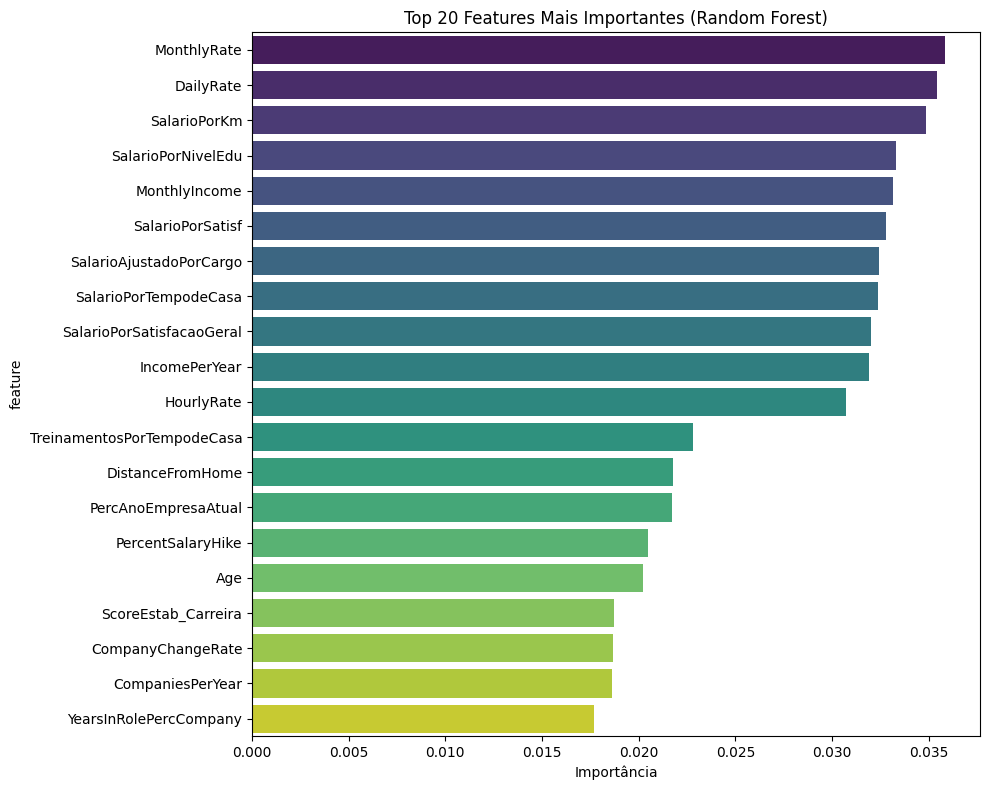

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)


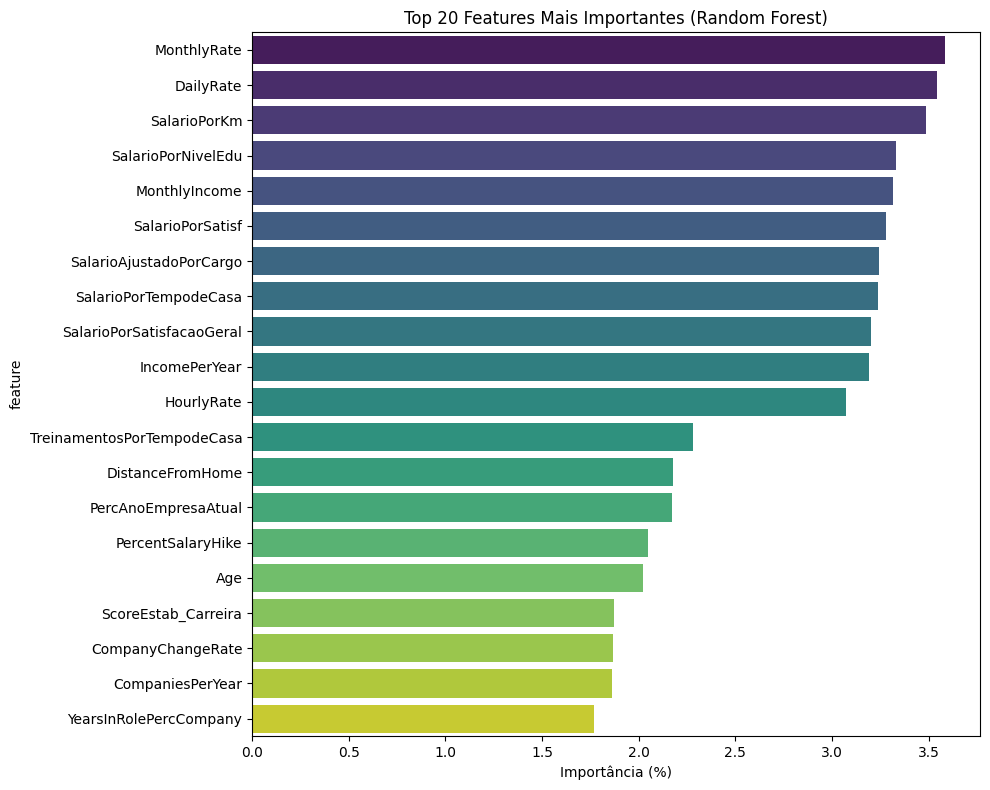

In [36]:
plt.figure(figsize=(10, 8))
feature_importance['importance_pct'] = feature_importance['importance'] * 100
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### Permutation importance
    Mede quanto a métrica do modelo cai quando uma feature é embaralhada. pois considera até correlações entre features.

In [26]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_quick, X_test_scaled, y_test, n_repeats=10, random_state=42)
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': result.importances_mean}).sort_values('importance', ascending=False)
imp_df

,feature,importance
8,JobSatisfaction,0.000207
43,SalarioPorSatisf,0.000119
52,SalarioAjustadoPorCargo,0.000110
35,PercAnoEmpresaAtual,0.000092
36,SalarioPorTempodeCasa,0.000087
...,...,...
47,SatisfacaoGeral,-0.000043
32,ScoreEstab_Carreira,-0.000054
78,OverTime_Yes,-0.000056
77,OverTime_No,-0.000103


In [39]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 8 to 41
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   feature         79 non-null     object 
 1   importance      79 non-null     float64
 2   importance_pct  79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [29]:
imp_df.sort_values('importance', ascending=False)

,feature,importance
8,JobSatisfaction,0.000207
43,SalarioPorSatisf,0.000119
52,SalarioAjustadoPorCargo,0.000110
35,PercAnoEmpresaAtual,0.000092
36,SalarioPorTempodeCasa,0.000087
...,...,...
47,SatisfacaoGeral,-0.000043
32,ScoreEstab_Carreira,-0.000054
78,OverTime_Yes,-0.000056
77,OverTime_No,-0.000103


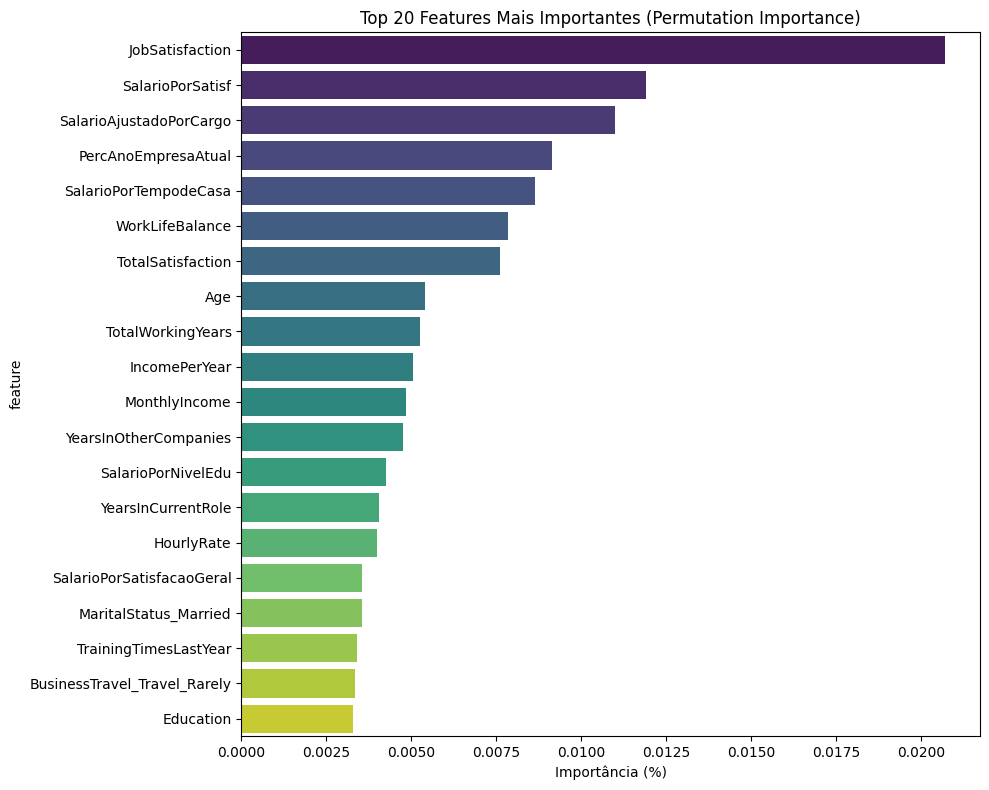

In [35]:
plt.figure(figsize=(10, 8))
imp_df['importance_pct'] = imp_df['importance'] * 100
sns.barplot(data=imp_df.head(20), x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Permutation Importance)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### SHAP

### SHAP

In [10]:
import shap
explainer = shap.TreeExplainer(rf_quick)
amostra = 2_000
X_sample = X_train_scaled[:amostra]
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values[1], X_sample, feature_names=X_train.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [17]:
print(shap_values[1].shape)
print(X_sample.shape)

(79, 2)
(2000, 79)


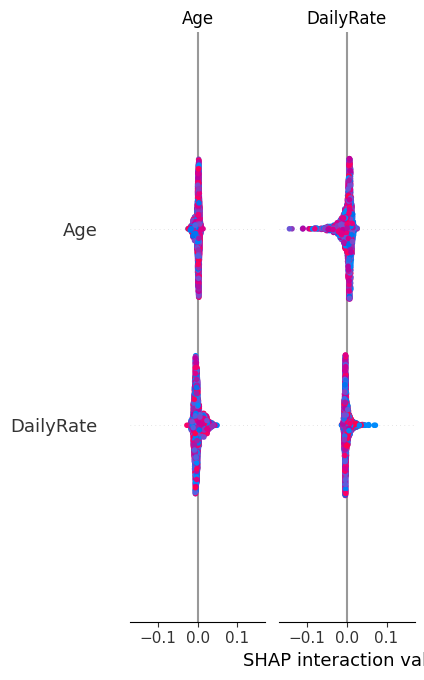

In [79]:
shap.summary_plot(shap_values, X_sample, feature_names=X_train.columns)


## Treinamento dos modelos

### Func avaliacao modelo

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome='Modelo'):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

    print(f"\n{nome}\n", "="*40)
    print(classification_report(y_test, y_pred, digits=3))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4,3))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0,1],[0,1],'k--')
    plt.title(f'Curva ROC - {nome}')
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.legend()
    plt.show()
    
    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(4,3))
    plt.plot(recall, precision)
    plt.title(f'Precision-Recall Curve - {nome}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

### xgboost


XGBoost
              precision    recall  f1-score   support

           0      0.822     0.997     0.901    164232
           1      0.399     0.009     0.017     35768

    accuracy                          0.820    200000
   macro avg      0.611     0.503     0.459    200000
weighted avg      0.746     0.820     0.743    200000



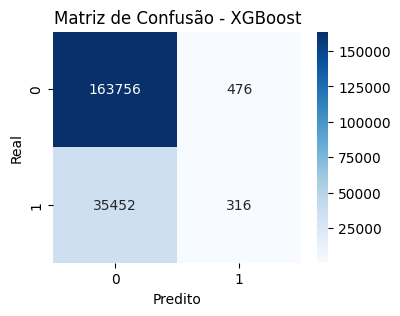

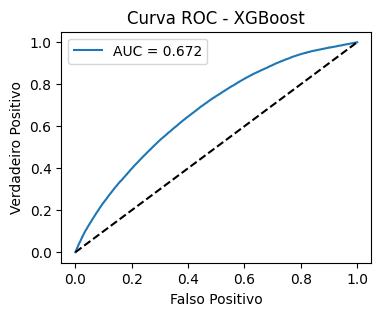

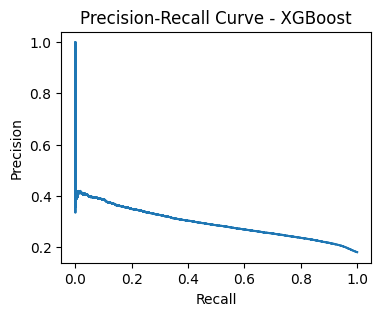

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
avaliar_modelo(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='XGBoost')

### random forest


Random Forest
              precision    recall  f1-score   support

           0      0.821     0.999     0.902    164232
           1      0.405     0.003     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.613     0.501     0.454    200000
weighted avg      0.747     0.821     0.742    200000



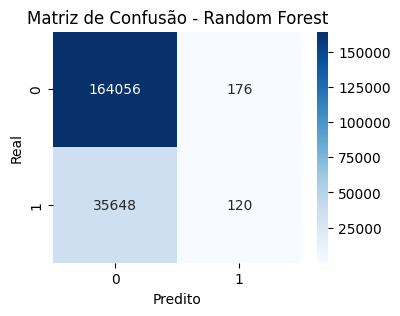

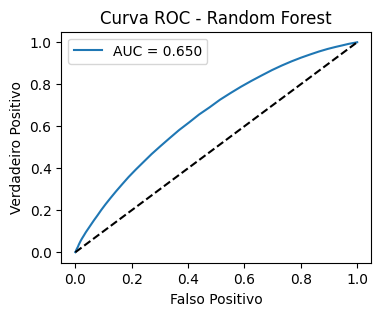

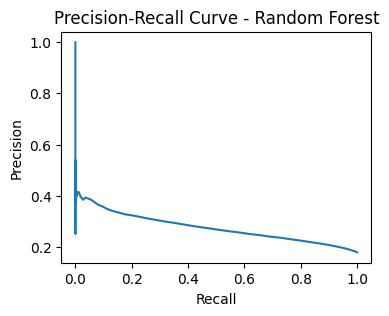

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
avaliar_modelo(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest')


### ligthgbm

In [67]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
avaliar_modelo(lgb_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='LightGBM')


OSError: dlopen(/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D44045CD-B874-3A27-9A61-F131D99AACE4> /Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)

### Logistic Regression
    


Logistic Regression
              precision    recall  f1-score   support

           0      0.822     0.999     0.902    164232
           1      0.524     0.004     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.673     0.501     0.455    200000
weighted avg      0.768     0.821     0.742    200000



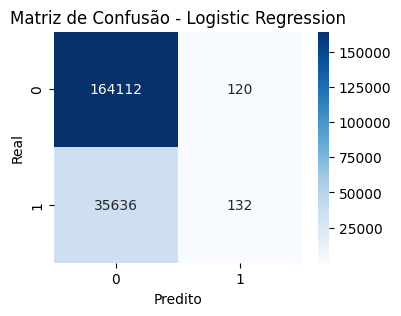

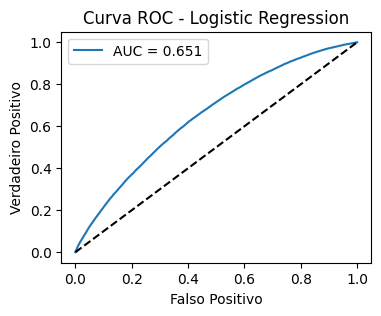

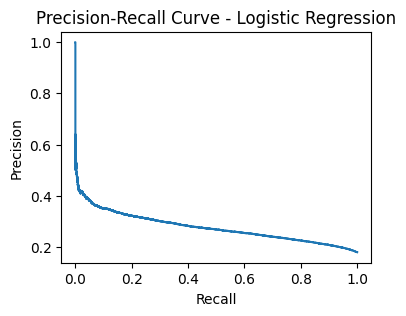

In [73]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
avaliar_modelo(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression')


### Decision Tree Classifier


Decision Tree
              precision    recall  f1-score   support

           0      0.831     0.809     0.820    164232
           1      0.219     0.245     0.231     35768

    accuracy                          0.708    200000
   macro avg      0.525     0.527     0.526    200000
weighted avg      0.722     0.708     0.715    200000



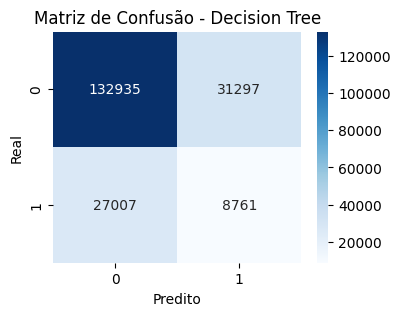

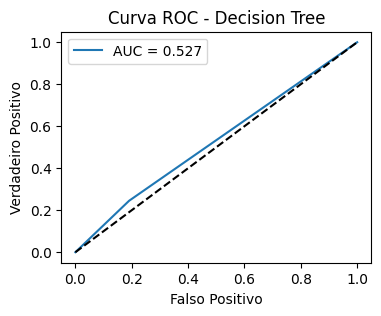

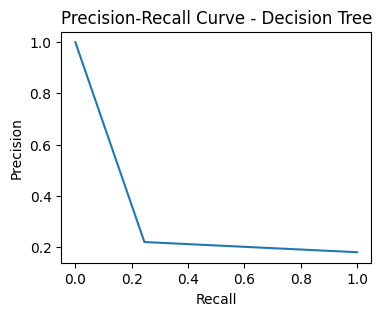

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
avaliar_modelo(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree')


### K-Nearest Neighbors (KNN)


KNN
              precision    recall  f1-score   support

           0      0.824     0.960     0.887    164232
           1      0.243     0.059     0.095     35768

    accuracy                          0.799    200000
   macro avg      0.534     0.509     0.491    200000
weighted avg      0.720     0.799     0.745    200000



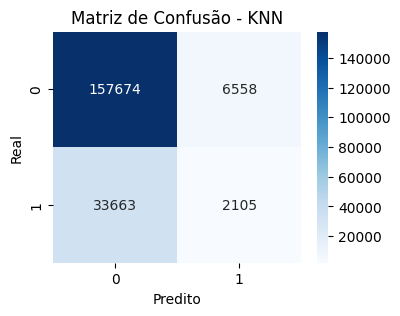

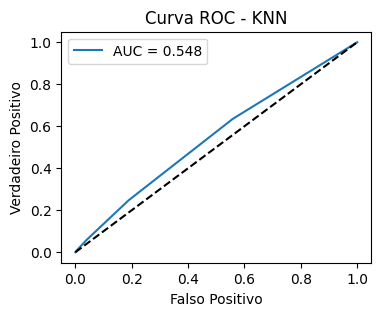

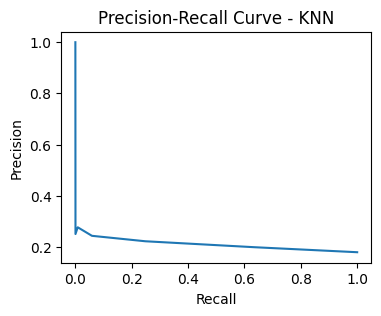

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
avaliar_modelo(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN')


## Com hiper

### CatBoost